## import Libraries

In [20]:
import numpy as np 
import os
import cv2
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [3]:
os.listdir('Dataset')

['Prediction', 'Train', 'Val']

## Telling the path

In [4]:
IMAGE_SIZE=[224,224]
train_path = 'Dataset/Train'
test_path = 'Dataset/Prediction '
val_path =  'Dataset/val'


## Image setup

In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                 shear_range =0.2,
                 zoom_range= 0.2,
                 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen = ImageDataGenerator(rescale= 1./255)


## Now telling the data 

In [6]:
train = train_datagen.flow_from_directory('Dataset/Train',
                                          target_size = (128,128),
                                          batch_size = 32,
                                          class_mode = 'categorical')
test = test_datagen.flow_from_directory('Dataset/Prediction',
                                          target_size = (128,128),
                                          batch_size = 32,
                                          class_mode = 'categorical')
val = val_datagen.flow_from_directory('Dataset/val',
                                          target_size = (128,128),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 288 images belonging to 2 classes.
Found 23 images belonging to 1 classes.
Found 60 images belonging to 2 classes.


## MODEL

In [7]:
base_model= VGG16(input_shape=(128,128,3),weights = 'imagenet',include_top=False)

## Start layering

In [8]:
for layer in base_model.layers :
    layer.trainable = False

In [9]:
inp = base_model.input
x = base_model.output
x = Flatten()(x)
x = Dense (1024,activation = 'relu')(x)
x = Dropout(0.5)(x)

output = Dense(2,activation = 'softmax')(x)
model = Model(inputs = inp, outputs =output)

In [10]:
model.compile(loss = 'categorical_crossentropy',
                optimizer ='adam',
                metrics = ['accuracy'])

In [11]:
model.fit(train,batch_size =32,epochs = 1,verbose = 1,validation_data=[val])



9/9 [==============================] - 416s 46s/step - loss: 2.3408 - accuracy: 0.6215 - val_loss: 0.0742 - val_accuracy: 0.9833


In [13]:
result =model.evaluate(test)

1/1 [==============================] - 25s 25s/step - loss: 5.7593 - accuracy: 0.4783


## testing model manually

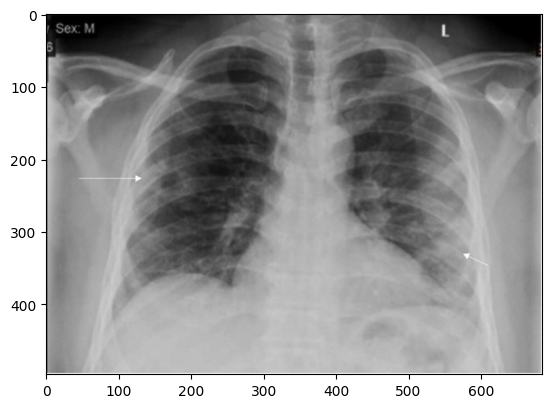

In [42]:
img =cv2.imread(r'C:\Users\Dell\Downloads\covid x-ray.jpg')

plt.imshow(img)


In [23]:
model.save(r'C:\Users\Dell\venv\MACHINE LEARNING (Self code)\model.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
my_model=load_model('model.h5')

In [28]:
img = image.load_img(r'C:\Users\Dell\Downloads\covid x-ray.jpg',target_size=(128,128))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [34]:
classes = my_model.predict(img_data)
classes

1/1 [==============================] - 1s 1s/step


array([[7.3057047e-16, 1.0000000e+00]], dtype=float32)

In [36]:
result=(int(classes[0][0]))
result

0

In [40]:
if result ==1:
     print('Person is affected by covid')
else:
    print('person is normal')

person is normal


0